# Итераторы

Для понимания, что делает yield, необходимо понимать, что такое генераторы. Генераторам же предшествуют итераторы. Когда вы создаёте список, вы можете считывать его элементы один за другим — это называется итерацией:

In [2]:
mylist = [1, 2, 3]
for i in mylist: print i,

1 2 3


Mylist является итерируемым объектом. Когда вы создаёте список, используя генераторное выражение, вы создаёте также итератор:

In [5]:
mylist = [x*x for x in range(5)]
for i in mylist: print i,

0 1 4 9 16


Всё, к чему можно применить конструкцию «for… in...», является итерируемым объектом: списки, строки, файлы… Это удобно, потому что можно считывать из них значения сколько потребуется — однако все значения хранятся в памяти, а это не всегда желательно, если у вас много значений.

# Генераторы

Генераторы это тоже итерируемые объекты, но прочитать их можно лишь один раз. Это связано с тем, что они не хранят значения в памяти, а генерируют их на лету:

In [6]:
mygenerator = (x*x for x in range(3))
for i in mygenerator: print i,

0 1 4


Всё то же самое, разве что используются круглые скобки вместо квадратных. 

__НО__: нельзя применить конструкцию for i in mygenerator второй раз, так как генератор может быть использован только единожды: он вычисляет 0, потом забывает про него и вычисляет 1, завершаяя вычислением 4 — одно за другим.

# Yield

Yield это ключевое слово, которое используется примерно как return — отличие в том, что функция вернёт генератор.

In [12]:
def createGenerator():
    mylist = range(6)
    for i in mylist:
        yield i*i

In [17]:
mygenerator = createGenerator()
print mygenerator

<generator object createGenerator at 0x7f60a06b89b0>


In [18]:
for i in mygenerator: print i,

0 1 4 9 16 25


В данном случае пример бесполезный, но это удобно, если вы знаете, что функция вернёт большой набор значений, который надо будет прочитать только один раз.

Чтобы освоить yield, вы должны понимать, что когда вы вызываете функцию, код внутри тела функции не исполняется. Функция только возвращает объект-генератор — немного мудрёно :-)

Ваш код будет вызываться каждый раз, когда for обращается к генератору.

### Входные данные
У вас имеется поток данных (генератор data_stream). Поля это случайные величины - так сделано для упрощения генерации данных. Есть три поля (названы по уровню сложности задания)

## Задание
###  Мотивация:

У вас есть куча временных рядов, вы хотите научиться предсказывать следующее значение по 1000 предыдущим. 1000 признаков окна это слишком много, однако вы решили заменить их 5ю: средним, дисперсией, минимумом, медианой и максимумом. Однако, все эти признаки надо подсчитать, причём хочется уметь это делать быстро (в течение часа)

### Для каждого поля нужно сделать следующее:

1) Пробежаться по данным окном размера 1000 (окно сдвигается на 1, то есть следующее окно пересекается с предыдущим по 999 элементам).

2) Для каждого окна посчитайте среднее значение поля и его дисперсию. Делайте yield этих значений, получая генератор tuple.

3) Для каждого окна найдине минимум, медиану и максимум в нём. Делайте yield этих значений, получая генератор tuple.


Ответом, который нужно будет засабмитить в гугл форму, является среднее значение tuple по получившемуся потоку, округлённое до 2го знака.

### Замечания

Обратите внимания как генерируются поля. Постарайтесь понять особенность каждого поля и как это можно использовать. Желательно, чтобы для каждого поля у вас было своё решение, максимально эффективно использующее знание об этом поле.

Полезные библиотеки: itertools, numpy, collections + всё что найдёте в интернете и можно поставить через pip install

Медианой отсортированного массива arr считайте значение arr[len(arr) // 2]
Если измерять время работы функций временем работы функции example, то примерное время работы такое: Одновременно среднее, дисперсия - 1.17 Одновременно минимум, максимум и медиана:easy - 0.87 medium - 2.11 nightmare - 2.85

### Генерация

In [280]:
from collections import namedtuple
import random

Record = namedtuple('Record', 'easy medium nightmare')

def data_stream():
    random_generator = random.Random(42)
    easy = 0
    for _ in range(1000000):
        easy += random_generator.randint(0, 2) 
        medium = random_generator.randint(0, 256 - 1)
        nightmare = random_generator.randint(0, 1000000000 - 1)
        
        yield Record(
            easy=easy,
            medium=medium,
            nightmare=nightmare)

In [281]:
def easy_stream():
    for record in data_stream():
        yield record.easy
        
def medium_stream():
    for record in data_stream():
        yield record.medium
        
def nightmare_stream():
    for record in data_stream():
        yield record.nightmare

In [212]:
for i in easy_stream():
    print i,
    
print '\n','--'*50

for i in medium_stream():
    print i,
    
print '\n','--'*50
    
for i in nightmare_stream():
    print i,    

1 1 3 3 3 4 6 8 10 10 12 14 16 17 17 17 18 18 19 21 23 25 25 25 27 28 28 28 29 30 30 31 33 35 37 38 39 39 41 42 44 45 45 47 49 50 52 53 54 56 
----------------------------------------------------------------------------------------------------
6 188 22 55 50 56 1 87 86 216 186 96 158 180 74 25 93 68 155 41 163 215 8 54 80 234 63 149 56 23 160 16 135 2 137 28 244 128 222 155 138 0 237 78 242 17 32 67 54 51 
----------------------------------------------------------------------------------------------------
275029318 676699487 421921819 505355288 649884437 589265683 805819251 155479499 92745843 603726031 536228091 552040631 861706900 45824383 79791976 277973603 370180967 936654587 171138648 379455441 556949743 775999911 315453048 942909714 655438665 458851852 561368134 897822883 997537606 47116375 792079364 381619286 971078377 720721819 266825189 434765250 875852940 178651880 298444791 152839268 778626478 324156057 878721877 57925166 85653452 760602165 475282378 872433041 539296088 31171

In [214]:
def example(stream):
    for value in stream:
        yield (value, value + 10)
        
for i in easy_stream():
    print i,

1 1 3 3 3 4 6 8 10 10 12 14 16 17 17 17 18 18 19 21 23 25 25 25 27 28 28 28 29 30 30 31 33 35 37 38 39 39 41 42 44 45 45 47 49 50 52 53 54 56


In [265]:
def Mean_stream(stream, k):
    """Yield mean of K numbers from stream"""
    numbers = [] # элементы окна
    sums = 0.0 # Сумма окна
    for i in stream:
        numbers.append(i)
        sums += i
        if len(numbers) > k: 
            sums -= numbers[0]
            numbers.pop(0)
            yield float(sums) / k

In [266]:
def Mean_of_stream(stream):
    sums, count = 0.0, 0
    for i in stream:
        count += 1
        sums += i
    return '{:0.2f}'.format(float(sums) / count)
        

In [282]:
%%time
print Mean_of_stream(Mean_stream(medium_stream(), 1000))

127.48
CPU times: user 15.9 s, sys: 72.2 ms, total: 15.9 s
Wall time: 15.9 s


In [243]:
const = [1 for _ in range(50)]
const_m = Mean_stream(const, 10)
easy = Mean_stream(easy_stream(), 10)
med = Mean_stream(medium_stream(), 5)
night = Mean_stream(nightmare_stream(), 10)

In [264]:
for i in Mean_stream(medium_stream(), 25):
    print i,

103.64 98.64 103.72 103.76 102.68 106.84 107.44 109.36 106.00 102.84 96.52 102.44 101.24 102.92 106.16 110.68 106.96 113.72 110.64 118.68 112.84 105.52 107.88 107.88 106.72 104.00 102.68 102.72 101.20 109.52 105.52 106.20 105.64 107.48 106.32 112.08 106.44 103.84 99.28 102.52 102.60 111.16 110.36 109.40 103.60 110.92 119.44 124.08 131.80 137.40 135.88 144.48 144.56 145.04 141.88 145.44 146.20 145.40 146.68 147.04 140.88 146.28 147.52 150.40 147.64 145.08 137.88 134.84 140.00 138.80 139.44 132.44 131.64 127.40 120.52 120.96 112.64 115.76 123.76 118.72 116.92 124.36 128.60 132.92 136.44 138.44 137.84 142.44 143.36 138.64 145.48 148.20 152.16 146.64 145.04 139.60 140.72 141.44 141.28 147.36 148.60 155.80 149.76 143.56 152.12 154.24 144.72 142.36 139.36 140.36 138.48 132.96 131.48 123.60 130.32 126.88 127.84 118.28 117.56 126.28 125.60 129.88 128.72 129.48 131.12 131.92 125.76 127.92 125.68 119.32 115.40 116.04 114.36 119.08 118.64 117.84 123.16 123.92 125.92 117.52 115.20 111.44 115.40 12

In [197]:
%matplotlib inline

In [198]:
import matplotlib.pyplot as plt

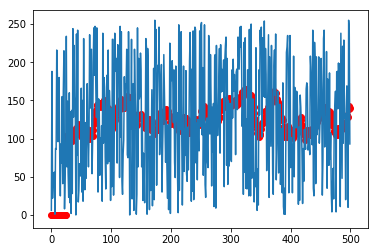

### Подсчёт среднего значения tuple по потоку

In [21]:
import numpy as np

def get_tuple_stream_mean(stream, number_of_values):
    result = np.zeros(number_of_values, dtype='object')
    count = 0. 
    for streamed_tuple in stream:
        result += streamed_tuple
        count += 1
    return ['{:0.2f}'.format(x) for x in result / count]

In [22]:
%%time
def example(stream):
    for value in stream:
        yield (value, value + 10)
        
print(get_tuple_stream_mean(example(easy_stream()), 2))

KeyboardInterrupt: 